# IMPLEMENTATION OF THE DECISION TREE 

## DECISION TREE FOR CLASSIFICATION

### Importing Libraries 

In [148]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the datasets

In [151]:

data = pd.read_csv(r"C:\Users\DJ COMPUTERS\OneDrive\Desktop\Jupyter\Iris.csv")
data.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### Data Pre-processing

In [154]:

data.isna().sum()    # checking for na/null values

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [156]:
data.duplicated()    # checking for duplicate records

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

### Data Mining


In [159]:

data["Species"].unique()    # finding unique classes

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [161]:
data["Species"].value_counts()    #finding the class segregation for each entries

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [163]:
data.info()     # getting the basic overview of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [165]:
data.describe()    # summary statistics of the data to know their distribution

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Data Visualization


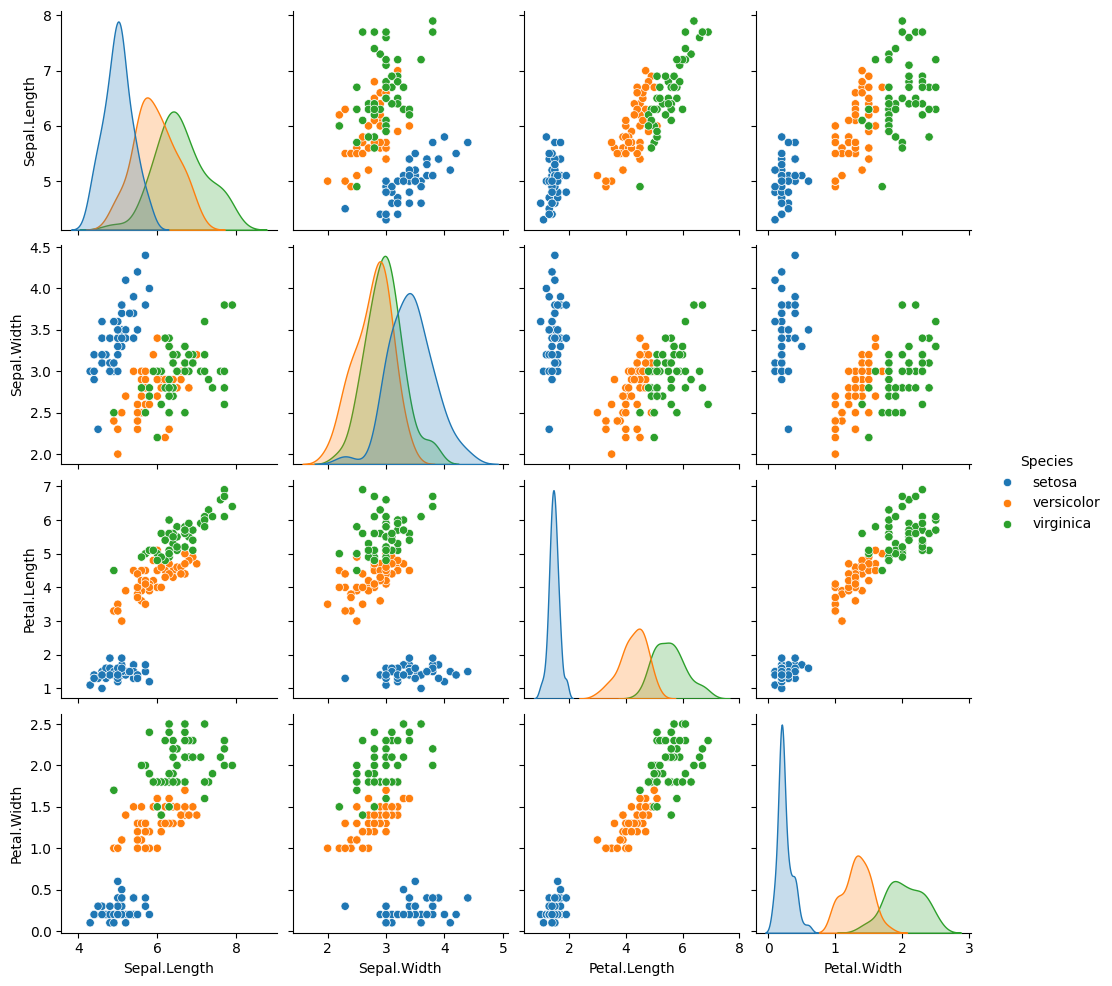

In [168]:

# Pairplot to understand the distribution of data
sns.pairplot(data,hue = "Species")
plt.show()

# too many overlapping of data points for versicolor and virginica
# since sepal width overlappps completely its a poor feature for classification

### Feature Engineering

In [171]:

# Creating a  copy of data for backup
df = data

# Label Encoding
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
for col in data.select_dtypes(include = "object").columns :
    data[col] = Le.fit_transform(data[col])

data["Species"].unique()


array([0, 1, 2])

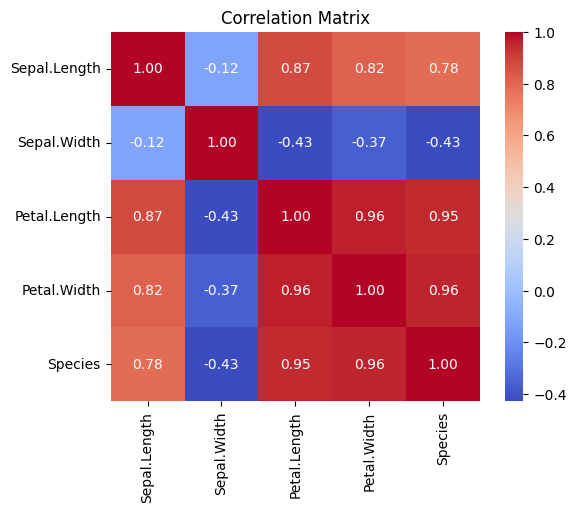

In [173]:
#Correlation Matrix

cor = data.corr()
cor  # here also we can see that sepal width is not a contributing feature.

# Corrplot

sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

### Model Training

In [176]:

# Separating features and labels
X = data.drop("Species",axis = 1)
Y = data['Species']


In [178]:
# Train test split

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [180]:
# Fitting the model

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="gini", max_depth=None, random_state=42)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

### Model Evaluation 


In [184]:

from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("Accuracy :",accuracy_score(Y_test,y_pred)*100)


Accuracy : 100.0


In [186]:
labels = ["setosa","versicolor","virginica"]

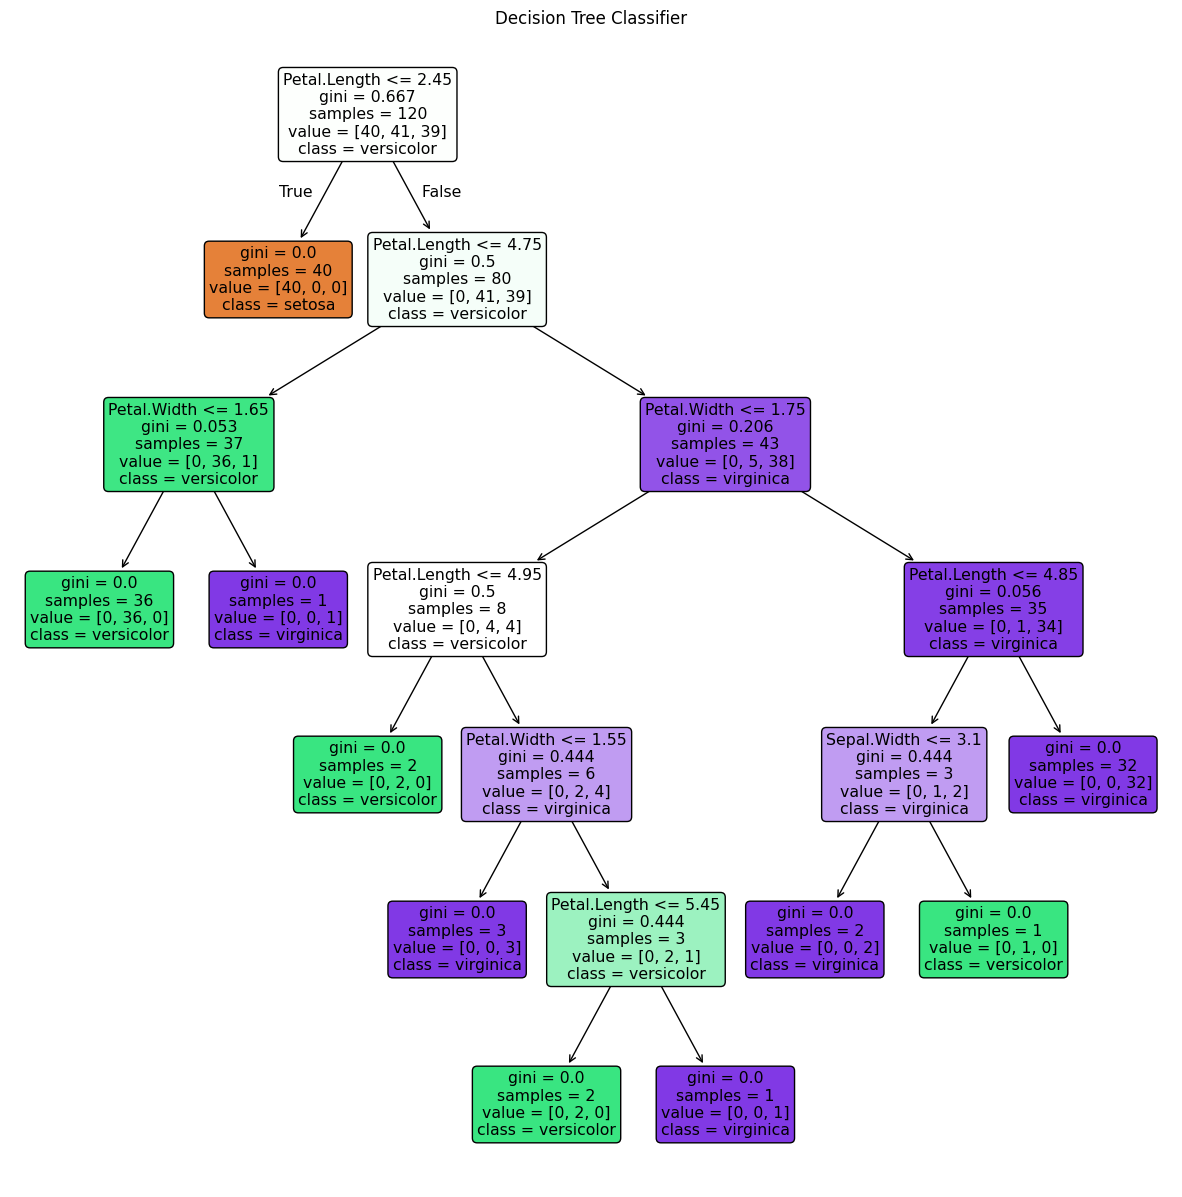

In [188]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,15))
plot_tree(clf, feature_names=X.columns, class_names=labels, filled=True, rounded=True)
plt.title("Decision Tree Classifier")
plt.show()